<a href="https://colab.research.google.com/github/farnoosh-afshinrad/Plant-Disease-Prediction/blob/main/PlantDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. I will use different layers and other hyperparameters for building, training, and testing this classification model. This project used Tensorflow and Keras.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Firstly, mount our google drive on colab, then, use the '%cd' to change directory to our drive.

 In the next step, Import library.

In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab_Notebooks/PlantDeseasesPrediction"

'Corn_(maize)___Common_rust_'   plant_model_weights.h5
 plant_disease.h5	        Potato___Early_blight
 plant_model.json	        Tomato___Bacterial_spot


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical 

Next, to making a CNN model, import all the required layers, activations, optimizers, etc.  

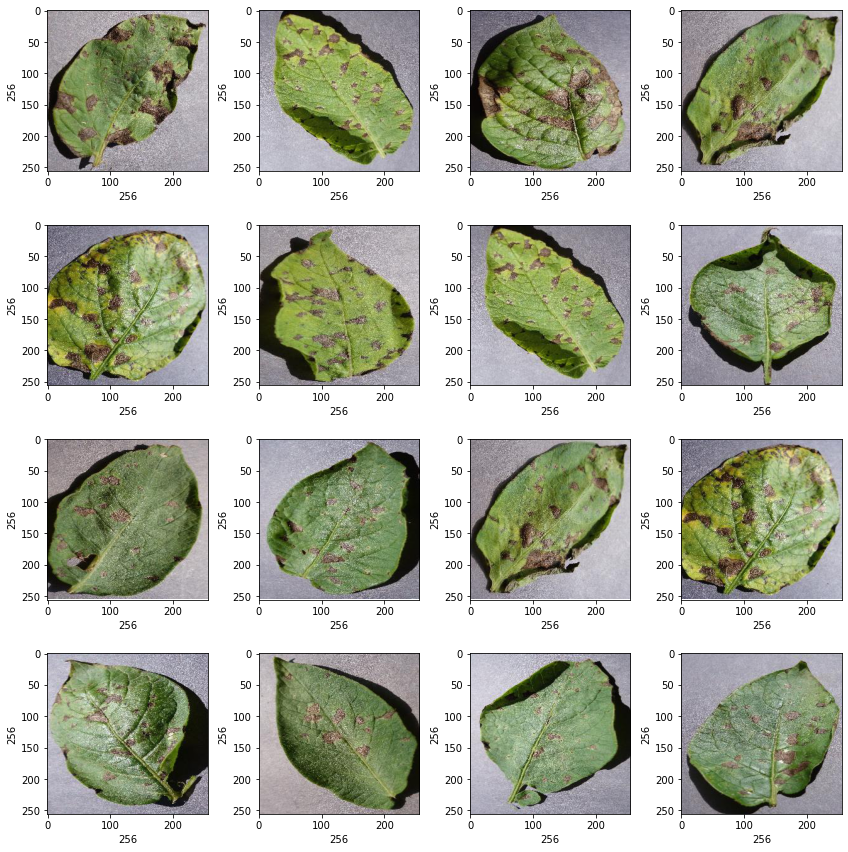

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Colab_Notebooks/PlantDeseasesPrediction/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Now observe some of the images that are their in our dataset. We will plot 12 images here using the matplotlib library.

In [ ]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

After visualizing the images, move forward and create a function which will convert the images into a numpy array.

 It is required because we should normalize our dataset after this.

In [ ]:
dir = '/content/drive/My Drive/Colab_Notebooks/PlantDeseasesPrediction'
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Now convert all the images into numpy array.

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    200
0    200
dtype: int64

Also observe the number of images under different classes to see if the dataset is balanced or not

In [ ]:
image_list[0].shape

(256, 256, 3)

Next observe the shape of the images.

In [ ]:
label_list = np.array(label_list)
label_list.shape

(700,)

Checking the total number of the images which is the length of the labels list.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Next, use sklearn train_test_split to split the dataset into testing and training data. 

Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

Now normalize the dataset of our images. As pixel values ranges from 0 to 255 so divide each image pixel with 255 to normalize the dataset.

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 225800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

Next create a network architecture for the model.

 We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

While compiling the model, we should set the type of loss, which will be Binary Cross Entropy for our model.

We also need to set the optimizer and the metrics, respectively.

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Next split the dataset into validation and training data.

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 33s 720ms/step - loss: 1.0794 - accuracy: 0.4330 - val_loss: 1.0312 - val_accuracy: 0.4821
Epoch 2/50
4/4 [==============================] - 1s 200ms/step - loss: 0.9922 - accuracy: 0.5759 - val_loss: 0.9308 - val_accuracy: 0.8750
Epoch 3/50
4/4 [==============================] - 1s 195ms/step - loss: 0.8866 - accuracy: 0.8482 - val_loss: 0.8246 - val_accuracy: 0.6875
Epoch 4/50
4/4 [==============================] - 1s 198ms/step - loss: 0.7921 - accuracy: 0.7388 - val_loss: 0.7512 - val_accuracy: 0.7232
Epoch 5/50
4/4 [==============================] - 1s 199ms/step - loss: 0.7148 - accuracy: 0.8393 - val_loss: 0.6893 - val_accuracy: 0.8482
Epoch 6/50
4/4 [==============================] - 1s 201ms/step - loss: 0.6522 - accuracy: 0.8638 - val_loss: 0.6317 - val_accuracy: 0.8036
Epoch 7/50
4/4 [==============================] - 1s 208ms/step - loss: 0.5955 - accuracy: 0.8705 - val_loss: 0.5846 - val_accuracy: 0.8571
Epoch 8/50
4/4 [===

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. 

Now we should train our model on 10 epochs and a batch size of 128. (More size give more accuracy but for this project and process, it should be enough).As a result, we don't need to run it for more.

In [ ]:
model.save("/content/drive/My Drive/Colab_Notebooks/ImageProcessing/PlantDeseasesPrediction/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/Colab_Notebooks/ImageProcessing/PlantDeseasesPrediction/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/Colab_Notebooks/ImageProcessing/PlantDeseasesPrediction/plant_model_weights.h5')

Saving the model using different techniques.

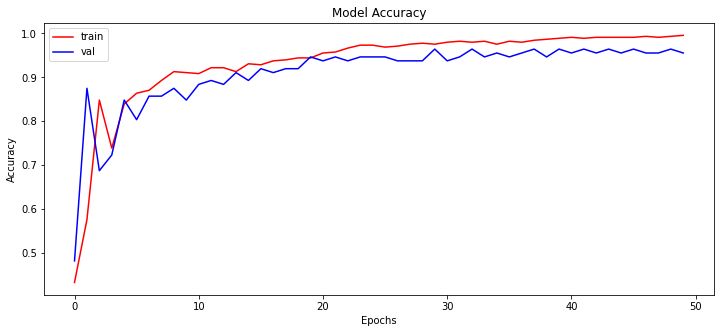

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Next, plot the accuracy of the model for the trainig history.

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 1s 54ms/step - loss: 0.0335 - accuracy: 1.0000
Test Accuracy: 100.0


Evaluating the model to know the accuracy of the model.


In [ ]:
y_pred = model.predict(x_test)

Next we will use our model to predict predicting the testing dataset label.

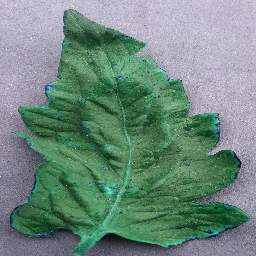

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot


Printing out the original and the predicted label.

## Conclusion

I started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that I created a CNN Model which is further used for predicting the plant diseases using the image supplied to model.


#TNX FOR FOLLOW ME TO THIS STEP.